# Homework 1
### Student: Assem Kussainova
### ID: 201535798

In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
def initialize_network(n_inputs, num_hidden, n_hidden, n_outputs):
    network = list()
    
    for j in range(num_hidden):
        hidden_layers = [{'weights':[random.uniform(0.001, 0.5) for i in range(n_inputs)]} for i in range(n_hidden)]
        network.append(hidden_layers)    
    output_layer = [{'weights':[random.uniform(0.001, 0.5) for i in range(n_hidden)]} for i in range(n_outputs)]
    network.append(output_layer)
    
    return network

In [3]:
def activate(w, inp):
    activation = w[-1]
    
    for i in range(len(w)-1):
        activation += w[i] * inp[i]
        
    return activation

In [4]:
def sigmoid(a):
    return 1/(1 + math.exp(-a))

In [5]:
def forward_propagate(network, inp):
    count = 0
    inputs = inp[:3]
    
    for layer in network:
        new_inputs = []
        
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = sigmoid(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
        count += 1
        if count == 1:
            inputs.append(inp[3])
            
    return inputs

In [6]:
def sigmoid_derivative(output):
    return output*(1 - output)

In [7]:
def backward_propagate(network, true_out):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['alpha'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(true_out[j] - neuron['output'])
                
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['alpha'] = errors[j] * sigmoid_derivative(neuron['output'])

In [8]:
def update_weights(network, inp, l_rate):
    for i in range(len(network)):
        inputs = inp[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
            
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['alpha'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['alpha']

In [9]:
def train_network(network, train, t, l_rate, n_epoch, n_outputs):
    errors = []
    
    for epoch in range(n_epoch):
        sum_error = 0
        outputs = forward_propagate(network, train)
        true = t
        sum_error += sum([(0.5 * ((true[i]-outputs[i])**2)) for i in range(len(true))])
        backward_propagate(network, true)
        update_weights(network, train, l_rate)
        errors.append(sum_error)
        
    return errors

In [10]:
learning_rate = 0.01
inputs = [0.2, 0.6, 0.25, 0.45]
targets = [0.1, 0.9]
plot = []

for i in range(10):
    network = initialize_network(3, 2, 2, 2)
    e = train_network(network, inputs, targets, learning_rate, 10000, 2)
    plot.append(e)

# Plot graph of error

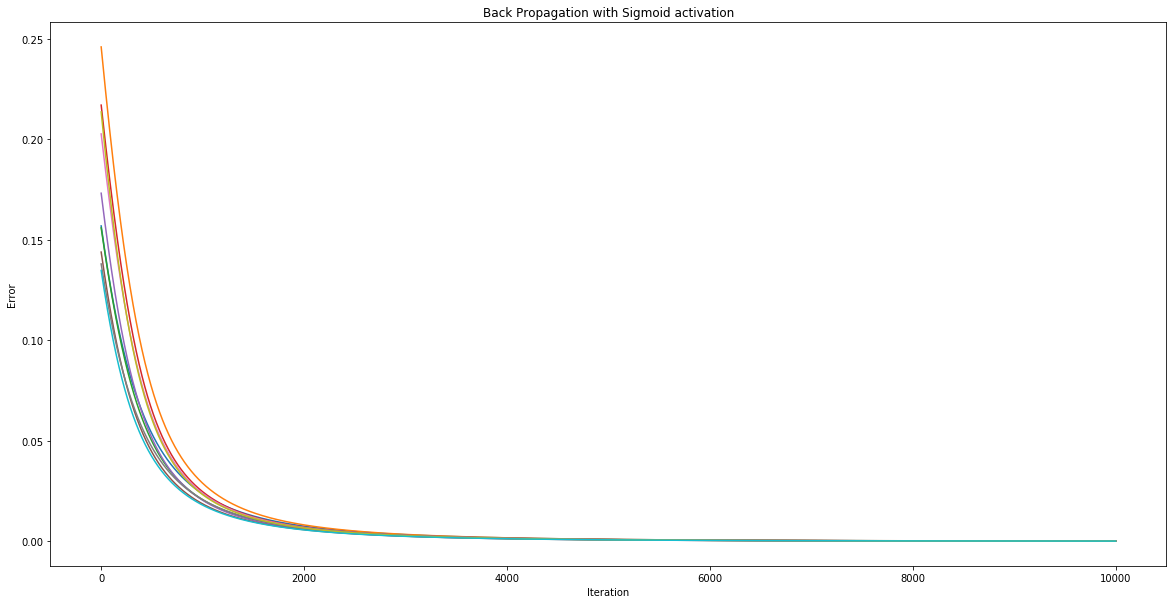

In [11]:
plot1 = plt.figure(1, figsize = (20, 10))
for i in range(len(plot)):
    plt.plot(list(range(1, 10001)), plot[i])
plt.title("Back Propagation with Sigmoid activation")
plt.xlabel('Iteration')
plt.ylabel('Error')

plt.show()